In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import cas as cas
import importlib
import pickle
import math
import inspect

 Solving the Vertex Cover Problem with 3 Qubits and calculating the energy spectra (not possible with 5 qubits with the accesible RAM). We tried this with exponential and linear verying ising values. From the energy spectra we could find the minimum energy gap in time, which didn't work optimally with the linear ising parameter. We could also validate the results and compared the result of the flux paramerts from linear and exponetial ising values. The solution for the scaling is at the bottom of the Hardware_5 notebook.

In [2]:
def vertex_cover_3(pts):
    
    #layout is a square with center point
    
    ising_dict = {};
    s = np.linspace(0, 1, pts)
    ising_dict["points"] = pts

    ising_dict["x_0"] = (np.ones(pts)-np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi
    ising_dict["x_1"] = (np.ones(pts)-np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi
    ising_dict["x_2"] = (np.ones(pts)-np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi
    
    A = 0.1
    B = 0.08

    ising_dict["z_0"] = -1*B*(np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi
    ising_dict["z_1"] = -1*B*(np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi
    ising_dict["z_2"] = -1*B*(np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi

    ising_dict["zz_0,1"] = -4*A*(np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi
    ising_dict["zz_0,2"] = -4*A*(np.power(np.linspace(0, 1, num=pts), 1/3))*2*np.pi
    
    return ising_dict, s



In [3]:
i_c = 230; c_shunt = 50; c_z = 4.4; lq = 480; alpha = 0.4; d = 0.0
qubit0 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit1 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)
qubit2 = cas.CSFQ(i_c, c_shunt, c_z, lq, alpha, d)

i_sigma = 565; c_sigma = 11; lc = 580; d = 0.0
coupler01 = cas.Coupler(i_sigma, c_sigma, lc, d)
coupler02 = cas.Coupler(i_sigma, c_sigma, lc, d)


C:\Users\domib\AppData\Roaming\Python\Python310\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


In [4]:
elements = [qubit0, coupler01, coupler02, qubit1, qubit2]

In [5]:
m = 65; m_mat = np.zeros((5,5))

m_mat[0, 1] = m 
m_mat[0, 2] = m 
m_mat[3, 1] = m 
m_mat[4, 2] = m

m_mat = -(m_mat + m_mat.T)

In [6]:
trunc_vec = np.array([6, 3, 3, 6, 6])
#trunc_vec = np.array([2,1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 6, 3, 6])

In [7]:
circuit = cas.AnnealingCircuit(elements, m_mat, trunc_vec)

In [8]:
ising_dict, s = vertex_cover_3(20)
print(ising_dict)

{'points': 20, 'x_0': array([6.28318531, 3.9285228 , 3.31649645, 2.88717432, 2.54539157,
       2.25676906, 2.00447958, 1.77887798, 1.5738603 , 1.38528992,
       1.21021873, 1.04646278, 0.8923539 , 0.74658568, 0.60811369,
       0.47608821, 0.3498076 , 0.22868496, 0.11222381, 0.        ]), 'x_1': array([6.28318531, 3.9285228 , 3.31649645, 2.88717432, 2.54539157,
       2.25676906, 2.00447958, 1.77887798, 1.5738603 , 1.38528992,
       1.21021873, 1.04646278, 0.8923539 , 0.74658568, 0.60811369,
       0.47608821, 0.3498076 , 0.22868496, 0.11222381, 0.        ]), 'x_2': array([6.28318531, 3.9285228 , 3.31649645, 2.88717432, 2.54539157,
       2.25676906, 2.00447958, 1.77887798, 1.5738603 , 1.38528992,
       1.21021873, 1.04646278, 0.8923539 , 0.74658568, 0.60811369,
       0.47608821, 0.3498076 , 0.22868496, 0.11222381, 0.        ]), 'z_0': array([-0.        , -0.188373  , -0.23733511, -0.27168088, -0.2990235 ,
       -0.3221133 , -0.34229646, -0.36034459, -0.376746  , -0.39183163,
   

In [9]:
custom_flux_dict_pwsw = circuit.get_custom_fluxes_pwsw(ising_dict, verbose=True, optimizer_method="leastsq")
with open('my_circuit', 'wb') as file:
    pickle.dump(circuit, file)

calculating qubit biases for qubit 1 of 3
point #19 single qubit residuals: 
 [-9.17684572e-02 -5.44723875e-06] 

calculating qubit biases for qubit 2 of 3


c:\users\domib\documents\hackathon\hardware\cas\cas\elements.py:617: UserWarning: For the point #19, solver found solutions that are not optimal. The relative error is 18.26 % for single qubit residuals
  warnings.warn(


point #19 single qubit residuals: 
 [-9.18962696e-02 -5.22381393e-06] 

calculating qubit biases for qubit 3 of 3


c:\users\domib\documents\hackathon\hardware\cas\cas\elements.py:617: UserWarning: For the point #19, solver found solutions that are not optimal. The relative error is 18.28 % for single qubit residuals
  warnings.warn(


point #19 single qubit residuals: 
 [-9.18962696e-02 -5.22381393e-06] 


 calculating coupler bias for coupler 1 of 2
schedule point 20 / 20
 calculating coupler bias for coupler 2 of 2


In [10]:
e_list = circuit.calculate_spectrum(custom_flux_dict_pwsw, levels=4)

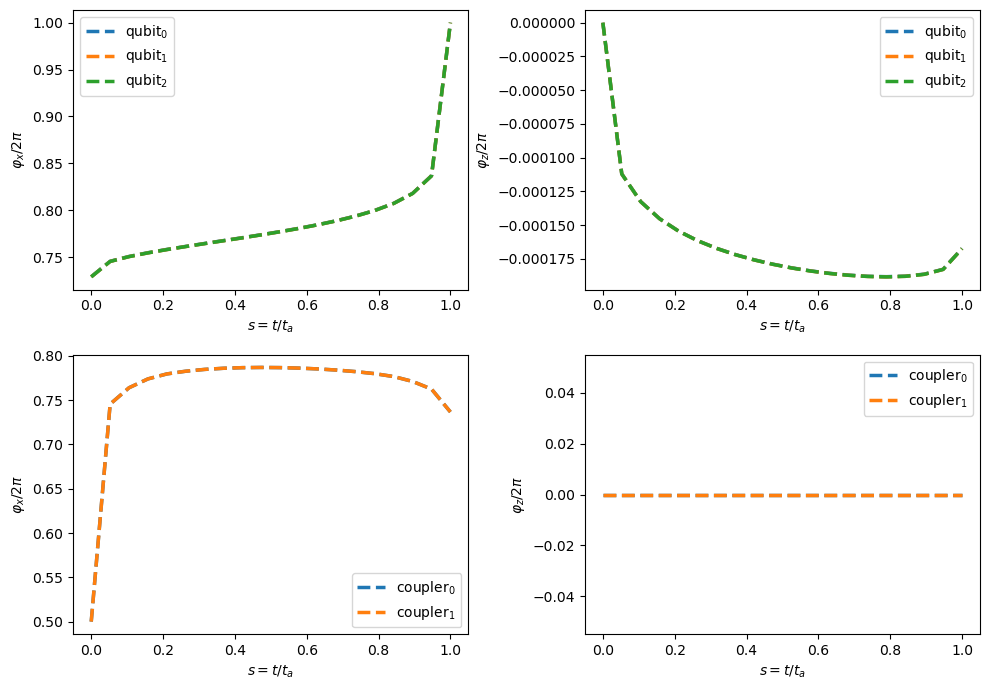

In [11]:
plt.clf()
fig = plt.figure(num=1)
fig.set_size_inches((10, 7))

ax1 = plt.subplot(2, 2, 1)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phix_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phix_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"qubit$_{0:d}$".format(i),)
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()

ax2 = plt.subplot(2, 2, 2)
for i, qubit_index in enumerate(circuit.qubit_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phiz_"+str(qubit_index)]/2/np.pi, label=r"qubit$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(qubit_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"qubit$_{0:d}$".format(i))
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
    
ax3 = plt.subplot(2, 2, 3)
# plt.hlines(1, 0, 1, alpha=0.3)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phix_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phix_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"coupler$_{0:d}$".format(i))
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_x/2\pi$")
    plt.legend()
    
    
ax4 = plt.subplot(2, 2, 4)
for i, coupler_index in enumerate(circuit.coupler_indices):
    
 #   plt.plot(s, custom_flux_dict_num["phiz_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
    plt.plot(s, custom_flux_dict_pwsw["phiz_"+str(coupler_index)]/2/np.pi, '--', color="C{0:d}".format(i), lw=2.5, label=r"coupler$_{0:d}$".format(i))
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"$\varphi_z/2\pi$")
    plt.legend()
       
    
    

    
plt.tight_layout()
plt.show()    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


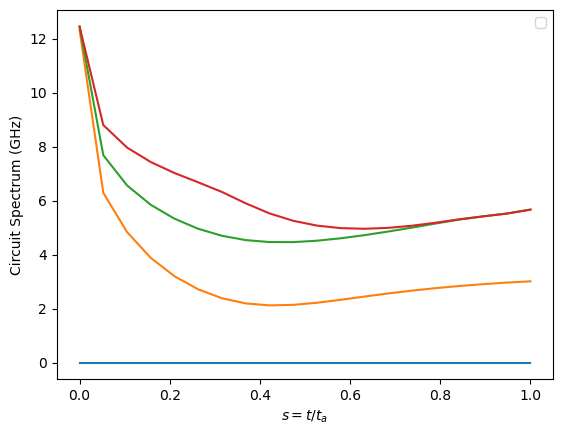

In [12]:
#   plt.plot(s, custom_flux_dict_num["phiz_"+str(coupler_index)]/2/np.pi, label=r"coupler$_{0:d}$".format(i))
plt.plot(s,e_list)
plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Circuit Spectrum (GHz)")
plt.legend()  
plt.show()

calculating qubit isings for qubit 1 of 3
calculating qubit isings for qubit 2 of 3
calculating qubit isings for qubit 3 of 3
calculating coupling strength for coupler 1 of 2
calculating coupling strength for coupler 2 of 2


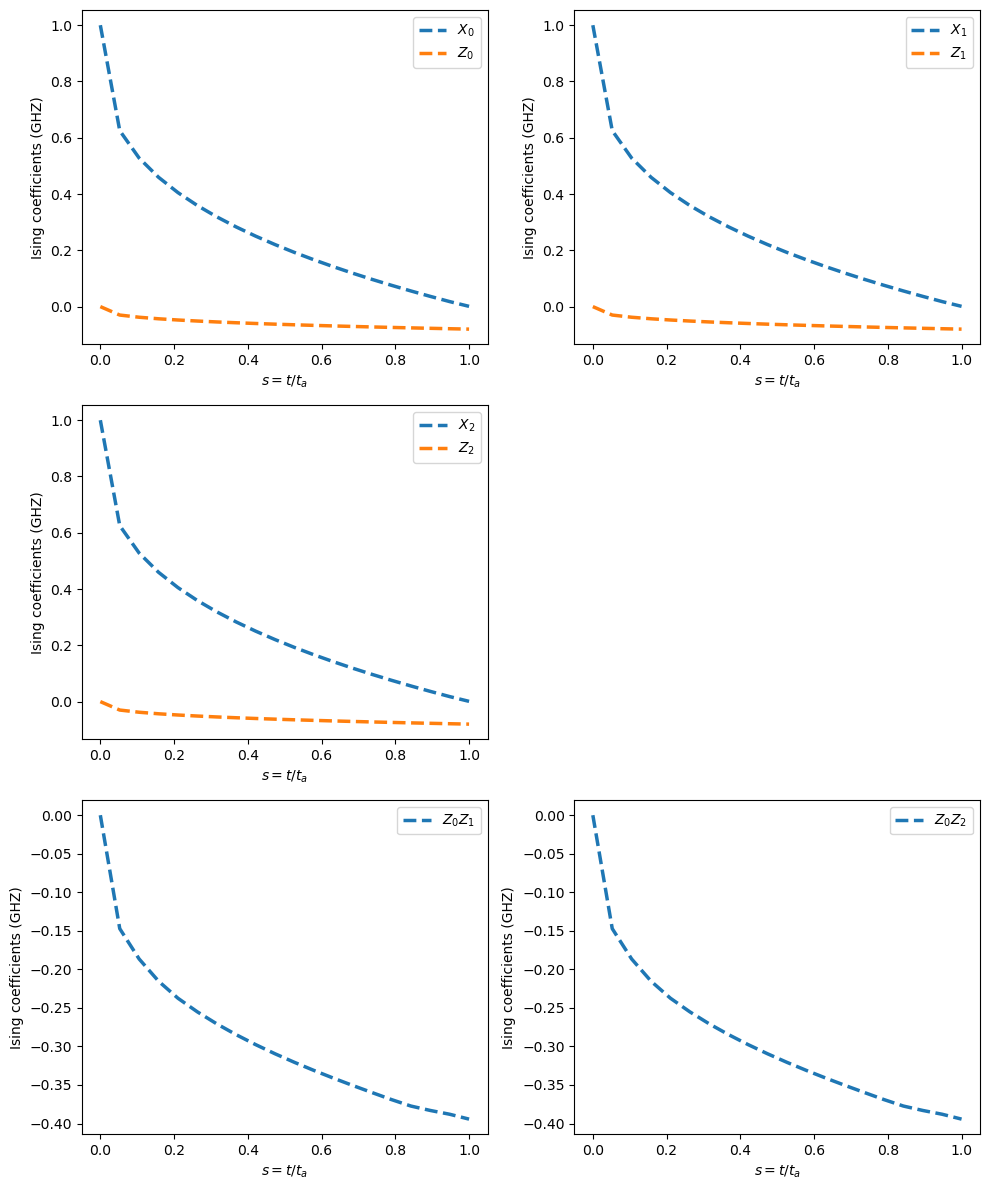

In [13]:
ising_pwsw_dict = circuit.get_ising_pwsw(custom_flux_dict_pwsw, verbose = True)

plt.clf();
fig = plt.figure(num=1);
fig.set_size_inches((10, 12))

for i in range(3):
    ax1 = plt.subplot(3, 2, i+1)
    
#    plt.plot(s, ising_sw_dict["x_"+str(i)]/2/np.pi, label=r"$X_{0:d}$".format(i), color="C0")
#    plt.plot(s, ising_sw_dict["z_"+str(i)]/2/np.pi, label=r"$Z_{0:d}$".format(i), color="C1")
    
    plt.plot(s, ising_pwsw_dict["x_"+str(i)]/2/np.pi, color="C0", label=r"$X_{0:d}$".format(i), ls='--', lw=2.5 )
    plt.plot(s, ising_pwsw_dict["z_"+str(i)]/2/np.pi, color="C1", label=r"$Z_{0:d}$".format(i), ls='--', lw=2.5 )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
labels = [[0, 1], [0, 2]]
for i in range(2):
    ax2 = plt.subplot(3, 2, i+5)
    
#    plt.plot(s, ising_sw_dict["zz_"+str(labels[i][0])+','+str(labels[i][1])]/2/np.pi, 
#             label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]))
    
    plt.plot(s, ising_pwsw_dict["zz_"+str(labels[i][0])+','+str(labels[i][1])]/2/np.pi, color="C0", ls='--', lw=2.5,label=r"$Z_{0:d}Z_{1:d}$".format(labels[i][0], labels[i][1]) )
    
    plt.xlabel(r"$s=t/t_a$"); plt.ylabel(r"Ising coefficients (GHZ)")
    plt.legend()
    
plt.tight_layout()
plt.show()